# 1. Importacion de Bibliotecas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy
import json
import joblib

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 2. Leer el Conjunto de Datos


In [ ]:
# Paso 2: Configurar la API de Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

# Crear el archivo kaggle.json con tus credenciales
kaggle_json = {
    "username": "angeljavierpl",  # Reemplaza con tu nombre de usuario de Kaggle
    "key": "b8dd26b25b3ffd504e002e102c7d674b"  # Reemplaza con tu clave de API de Kaggle
}

import json
with open('/content/kaggle.json', 'w') as file:
    json.dump(kaggle_json, file)

# Asegurarse de que las credenciales estén configuradas correctamente
!chmod 600 /content/kaggle.json

# Paso 3: Descargar el conjunto de datos desde Kaggle
!kaggle datasets download -d burak3ergun/loan-data-set -p /content/

# Descomprimir el archivo descargado
!unzip /content/loan-data-set.zip -d /content/

df = pd.read_csv('/content/loan_data_set.csv')  # Ruta
df.head()

Dataset URL: https://www.kaggle.com/datasets/burak3ergun/loan-data-set
License(s): unknown
  0% 0.00/7.80k [00:00<?, ?B/s]
100% 7.80k/7.80k [00:00<00:00, 9.67MB/s]
Archive:  /content/loan-data-set.zip
  inflating: /content/loan_data_set.csv  


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


# 3. Exploración de Datos

## 3.1 Variable Categórica




### 3.1.1 ID de Préstamos

In [ ]:
df.Loan_ID.value_counts(dropna=False)

,count
Loan_ID,
LP001002,1
LP002328,1
LP002305,1
LP002308,1
LP002314,1
...,...
LP001692,1
LP001693,1
LP001698,1


### 3.1.2 Sexo

In [ ]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,489
Female,112
NaN,13


<ipython-input-6-4a1861040e11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


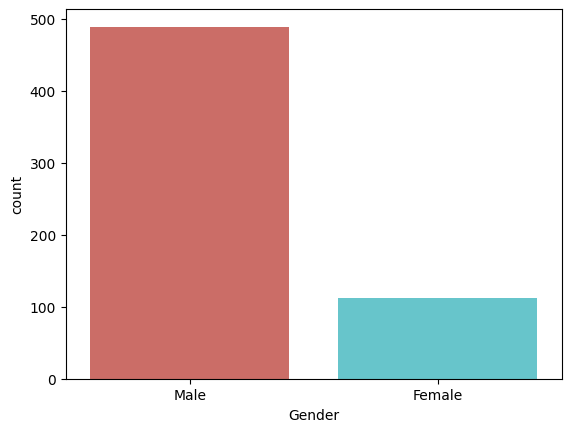

In [ ]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [ ]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Porcentaje de aplicantes Hombres (Male): {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Porcentaje de aplicantes Mujeres (Female): {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Porcentaje de aplicantes Hombres (Male): 79.64%
Porcentaje de aplicantes Mujeres (Female): 18.24%
Porcentaje de valores faltantes: 2.12%


### 3.1.3 Estado Civil

In [ ]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,398
No,213
NaN,3


<ipython-input-9-98d68ac191b2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="Paired")


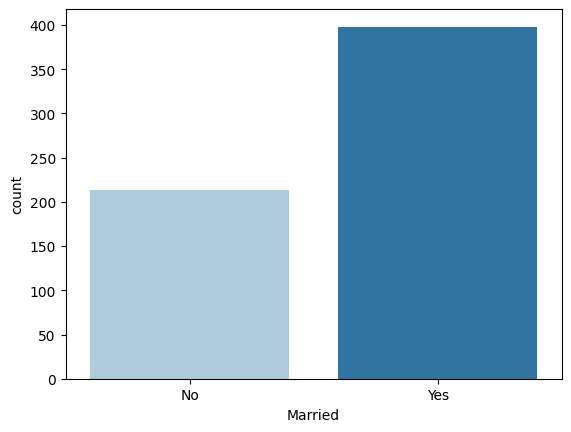

In [ ]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [ ]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Porcentaje de Casado (Married): {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Porcentaje de Soltero (Not married): {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Married))*100)))

Porcentaje de Casado (Married): 64.82%
Porcentaje de Soltero (Not married): 34.69%
Porcentaje de valores faltantes: 0.49%


### 3.1.4 Educación

In [ ]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,480
Not Graduate,134


<ipython-input-12-8e9ea3c8e87a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="rocket")


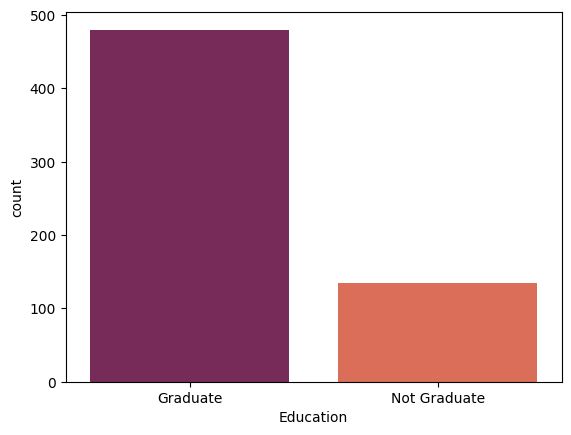

In [ ]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [ ]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Porcentaje de aplicantes Graduados (Graduate): {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Porcentaje de aplicantes No graduados (Not Graduate): {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Education))*100)))

Porcentaje de aplicantes Graduados (Graduate): 78.18%
Porcentaje de aplicantes No graduados (Not Graduate): 21.82%
Porcentaje de valores faltantes: 0.00%


### 3.1.5 Autónomo

In [ ]:
df.Self_Employed.value_counts(dropna=False)

,count
Self_Employed,
No,500
Yes,82
NaN,32


<ipython-input-15-283837bf1c2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


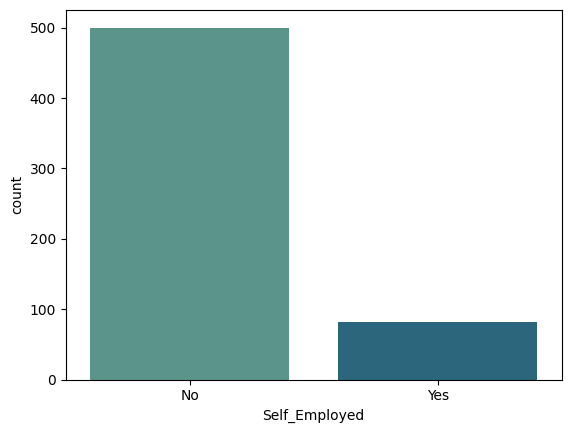

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [ ]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Porcentaje de No Autónomo (Not self employed): {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Porcentaje de Autónomo (Self employed): {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Porcentaje de No Autónomo (Not self employed): 81.43%
Porcentaje de Autónomo (Self employed): 13.36%
Porcentaje de valores faltantes: 5.21%


### 3.1.6 Historial Crediticio

In [ ]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,475
0.0,89
NaN,50


<ipython-input-18-b2abd7acd8ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="viridis")


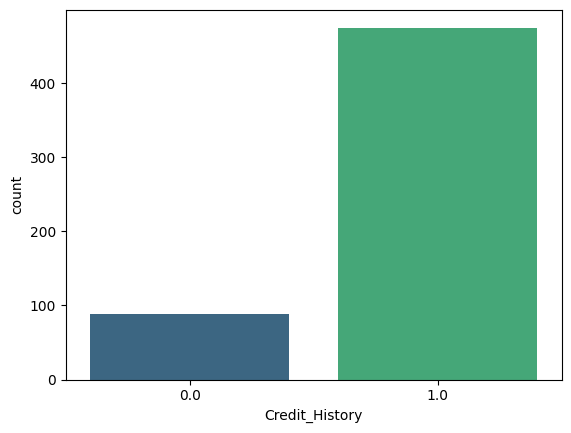

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [ ]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Porcentaje de Buen historial crediticio: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Porcentaje de Mal historial crediticio: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Porcentaje de Buen historial crediticio: 77.36%
Porcentaje de Mal historial crediticio: 14.50%
Porcentaje de valores faltantes: 8.14%


### 3.1.7 Área de la Propiedad

In [ ]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


<ipython-input-21-3f0e29f42635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="cubehelix")


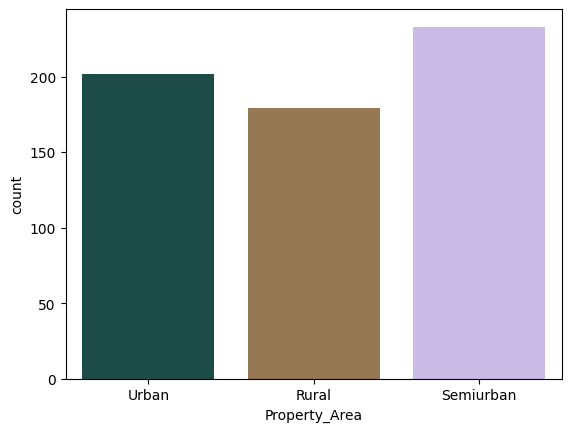

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [ ]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Porcentaje de Urbano: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Porcentaje de Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Porcentaje de Semiurbano: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Porcentaje de Urbano: 32.90%
Porcentaje de Rural: 29.15%
Porcentaje de Semiurbano: 37.95%
Porcentaje de valores faltantes: 0.00%


### 3.1.8 Estado del Préstamo

In [ ]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


<ipython-input-24-06b98ed0a451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


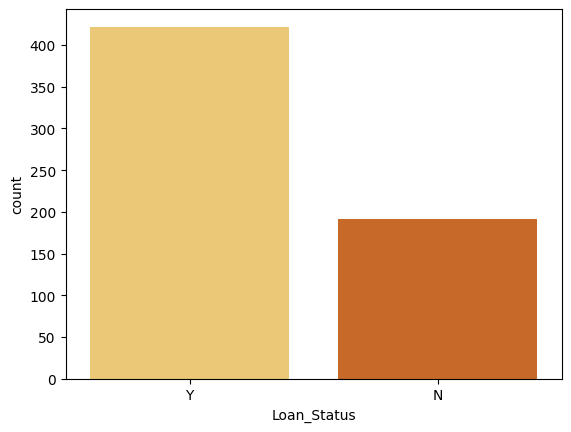

In [ ]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [ ]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Porcentaje de Aprobados: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Porcentaje de Rechazados: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Porcentaje de Aprobados: 68.73%
Porcentaje de Rechazados: 31.27%
Porcentaje de valores faltantes: 0.00%


### 3.1.9 Plazo del Monto del Préstamo

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
NaN,14
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2


<ipython-input-27-88751c2297d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")


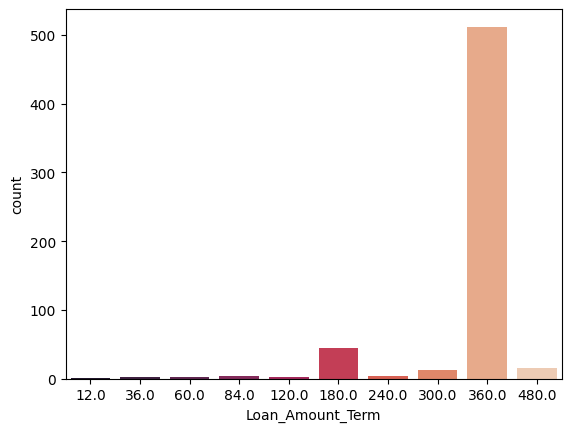

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [ ]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Porcentaje de 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Porcentaje de valores faltantes: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Porcentaje de 12: 0.16%
Porcentaje de 36: 0.33%
Porcentaje de 60: 0.33%
Porcentaje de 84: 0.65%
Porcentaje de 120: 0.49%
Porcentaje de 180: 7.17%
Porcentaje de 240: 0.65%
Porcentaje de 300: 2.12%
Porcentaje de 360: 83.39%
Porcentaje de 480: 2.44%
Porcentaje de valores faltantes: 2.28%


## 3.2 Variable Numérica








### 3.2.1 Describir Variable Numérica


In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### 3.2.2 Distribución de la Variable Numérica

#### 3.2.2.1 Distribución de Histograma

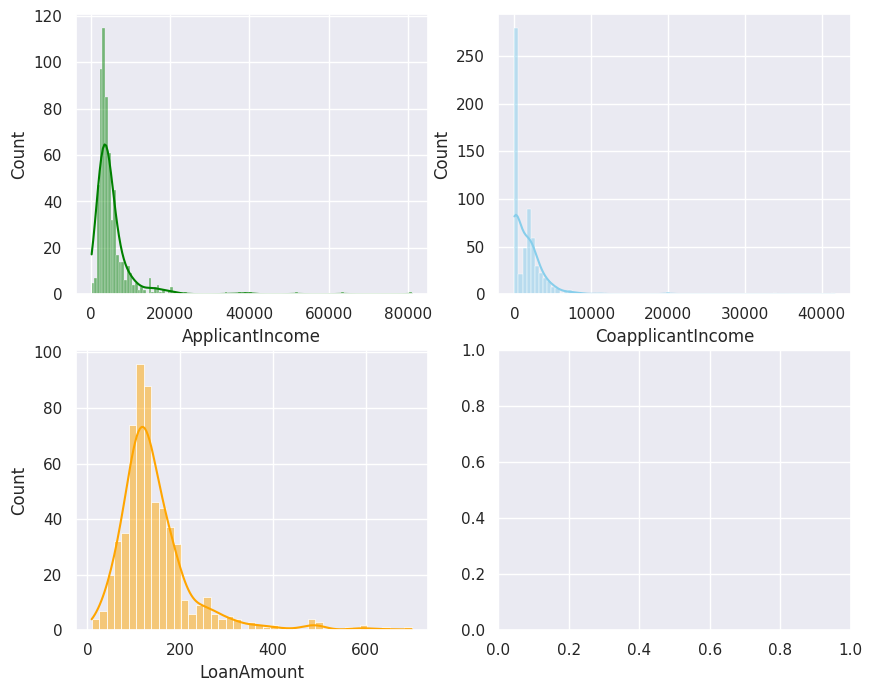

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

#### 3.2.2.2 Gráfico de Violín

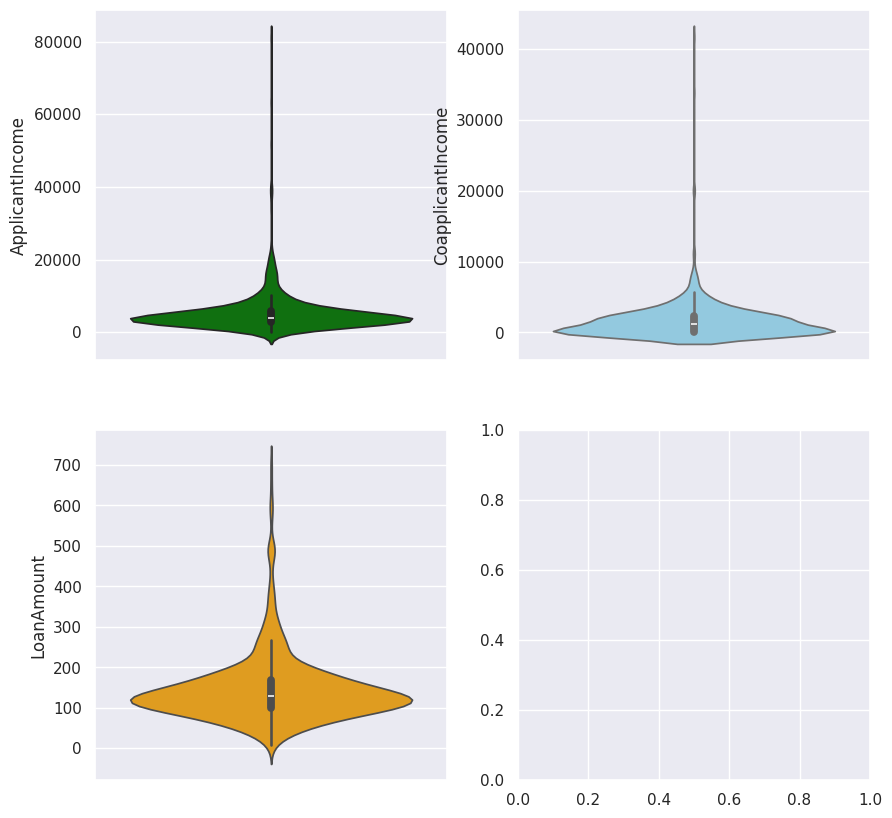

In [ ]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

* La distribución del **Ingreso del Solicitante, Ingreso del Co-Solicitante y Monto del Préstamo** es **asimétrica positiva** y **tiene valores atípicos** (como se puede observar tanto en el histograma como en el gráfico de violín).
* La distribución del **Plazo del Monto del Préstamo** es **asimétrica negativa** y **tiene valores atípicos**.


## 3.3 Exploración Adicional



### 3.3.1 Mapa de Calor

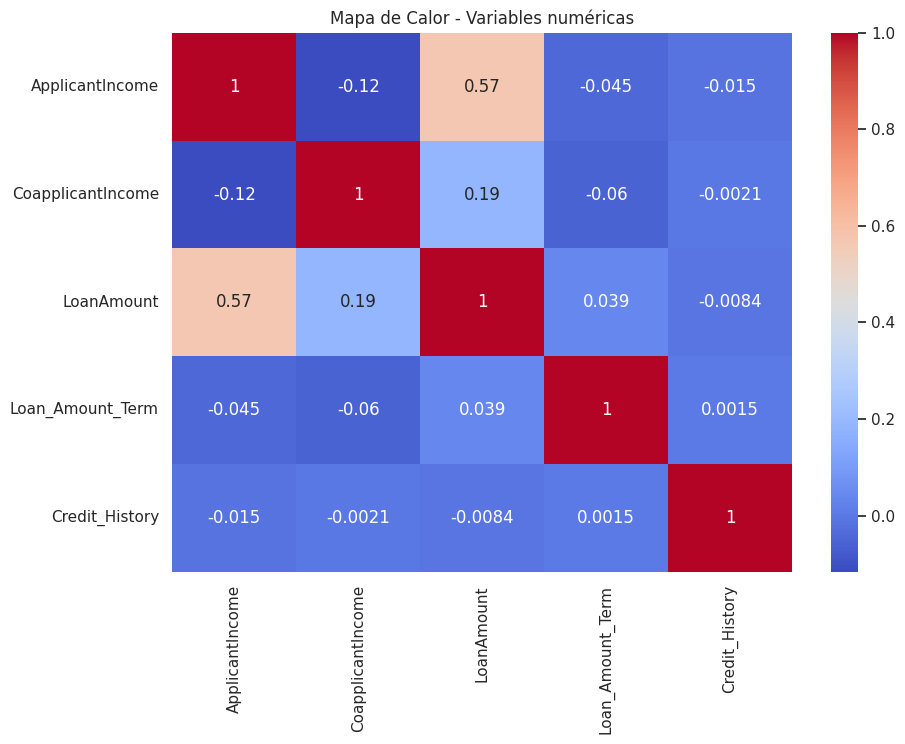

In [ ]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Variables numéricas')
plt.show()

### 3.3.2 Categórico - Categórico

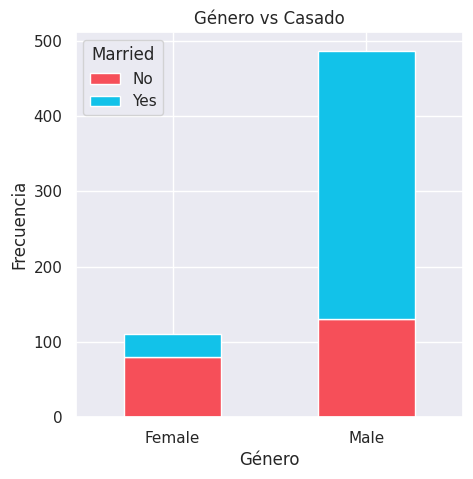

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Género vs Casado')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

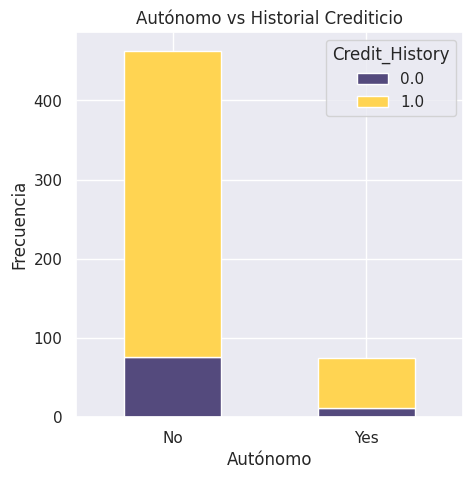

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Autónomo vs Historial Crediticio')
plt.xlabel('Autónomo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

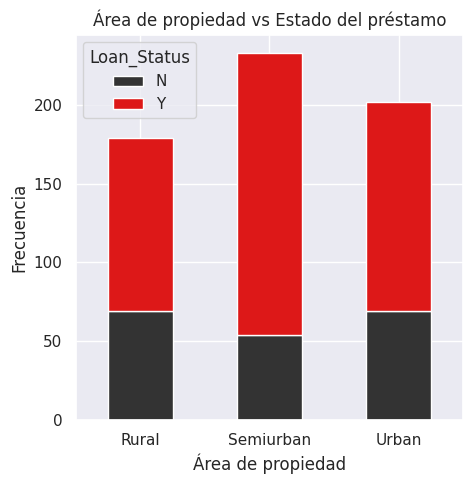

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Área de propiedad vs Estado del préstamo')
plt.xlabel('Área de propiedad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

### 3.3.3 Categórico - Numérico

<ipython-input-36-0a4d7fb48f1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


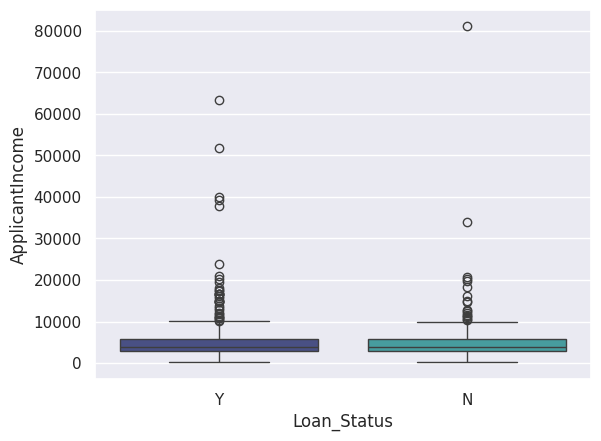

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

<ipython-input-37-e41ee8c4d05d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


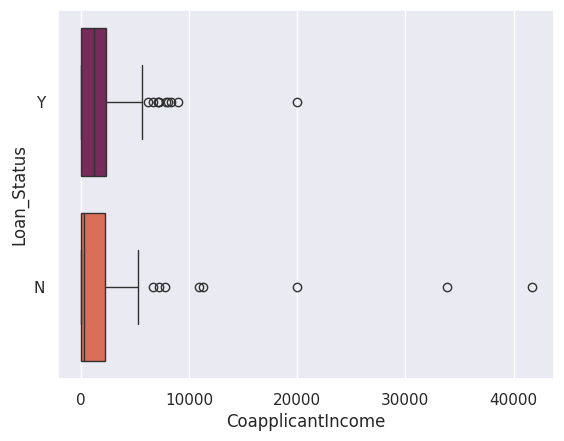

In [ ]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

<ipython-input-38-7caa0fac4fb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


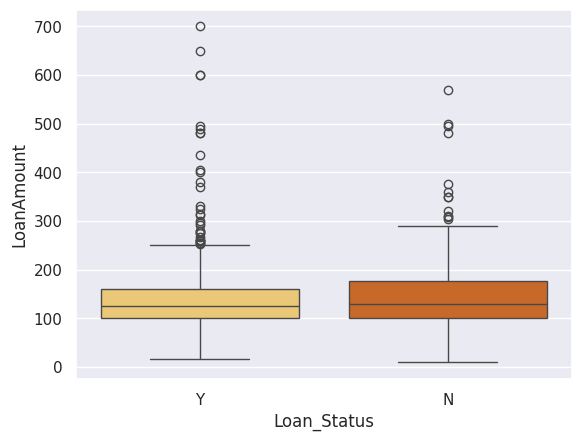

In [ ]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

### 3.3.4 Numérico - Numérico

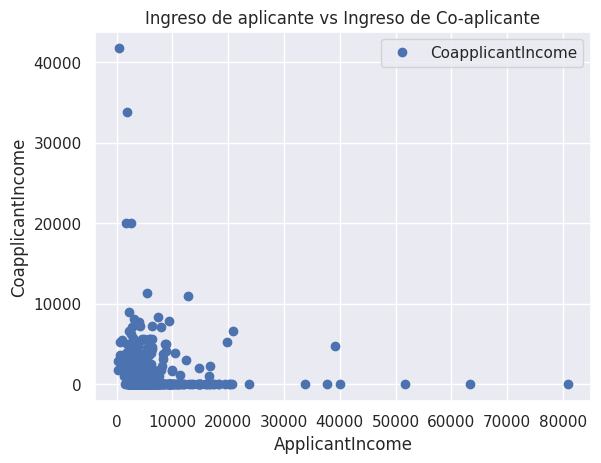

Correlación de Pearson: -0.11660458122889966
Prueba T y valor P: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [ ]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Ingreso de aplicante vs Ingreso de Co-aplicante')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Correlación de Pearson:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('Prueba T y valor P: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

## 3.3.5 Valores Nulos

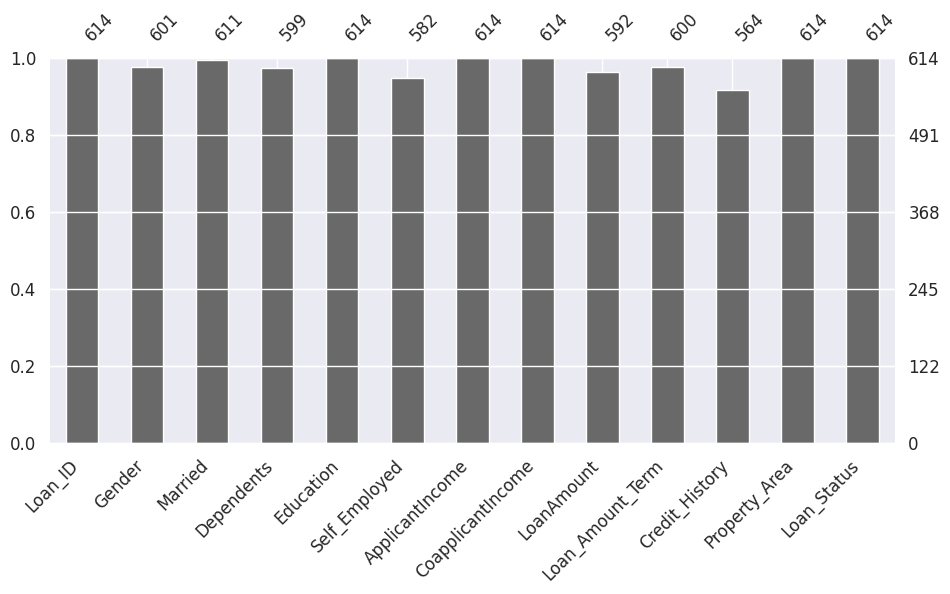

In [ ]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

# 4. Preprocesamiento de Datos

## 4.1 Descartar Variables No Necesarias

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)

## 4.2 Amputación de Datos

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

<ipython-input-42-a16f4fd21f84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
<ipython-input-42-a16f4fd21f84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<ipython-input-43-2da661834cad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)


## 4.3 Codificación One-hot

In [ ]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

## 4.4 Eliminar Valores Atípicos


In [ ]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columnas a revisar por valores atípicos
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Eliminar valores atípicos con IQR
df = remove_outliers_iqr(df, columns)

## 4.5 Tratamiento de Distribución Sesgada


In [ ]:
# Aplica la transformación de raíz cuadrada

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

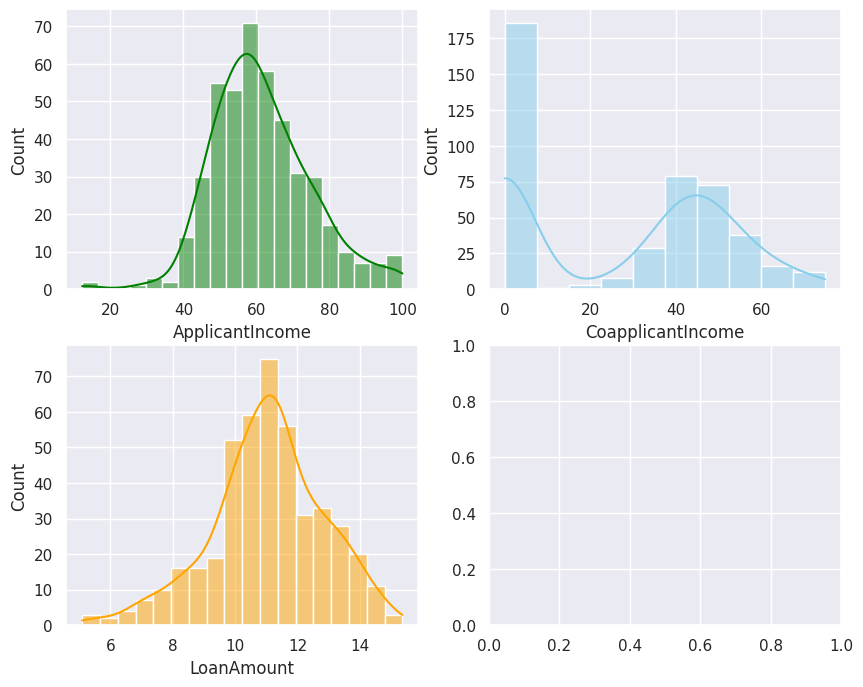

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Histogramas y estimaciones de densidad del kernel (KDE)
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

## 4.6 Separación de Variables Características

In [ ]:
# Separa el DataFrame 'df' en dos variables: 'X' e 'y'.
# 'X' contiene todas las columnas excepto 'Loan_Status'.
X = df.drop(["Loan_Status"], axis=1)
# 'y' contiene únicamente la columna 'Loan_Status'.
y = df["Loan_Status"]

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,11.313708,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,67.697858,38.832976,11.313708,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,54.772256,0.000000,8.124038,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,50.823223,48.559242,10.954451,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,77.459667,0.000000,11.874342,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


## 4.7 Técnica de Sobremuestreo Sintético para la Minoría (SMOTE)

In [ ]:
# Aplica la técnica SMOTE (Synthetic Minority Over-sampling Technique) para balancear las clases en el conjunto de datos.
# 'X' contiene las variables características y 'y' la variable objetivo.
X, y = SMOTE().fit_resample(X, y)

<ipython-input-51-464dc99333fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


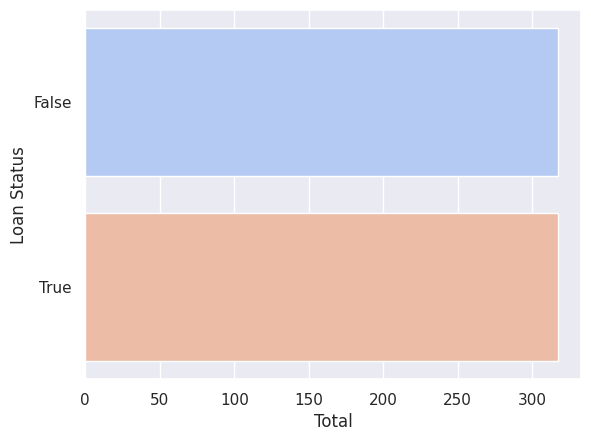

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## 4.8 Normalización de Datos


In [ ]:
# Aplica la normalización Min-Max a las variables características 'X', escalando cada característica para que esté en el rango [0, 1].
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 4.9 División del Conjunto de Datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 5. Modelos

## 5.1 Árbol de Decisión

Decision Tree Accuracy: 87.40%
Confusion Matrix:
[[56 12]
 [ 4 55]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.82      0.88        68
        True       0.82      0.93      0.87        59

    accuracy                           0.87       127
   macro avg       0.88      0.88      0.87       127
weighted avg       0.88      0.87      0.87       127

Auc Score: 86.71%


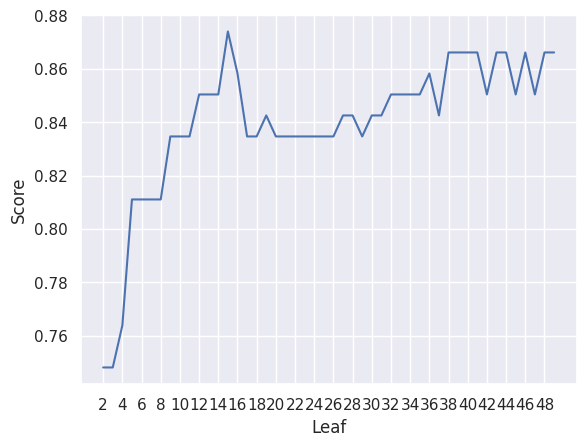

In [ ]:
scoreListDT = []
best_tree = None
best_accuracy = 0

for i in range(2, 50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    y_pred = DTclassifier.predict(X_test)
    current_score = accuracy_score(y_test, y_pred)
    scoreListDT.append(current_score)

    if current_score > best_accuracy:
        best_accuracy = current_score
        best_tree = DTclassifier
        best_pred = y_pred

DTAcc = best_accuracy

print("Decision Tree Accuracy: {:.2f}%".format(DTAcc * 100))

conf_matrix = confusion_matrix(y_test, best_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Reporte de clasificación para el mejor modelo
print("Classification Report:")
print(classification_report(y_test, best_pred))

rocDT = roc_auc_score(y_test, y_pred)
print('Auc Score: {:.2f}%'.format(rocDT*100))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,2))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)

## 5.2 Bosque Aleatorio

Precisión Bosque Aleatorio: 84.25%
              precision    recall  f1-score   support

       False       0.96      0.74      0.83        68
        True       0.76      0.97      0.85        59

    accuracy                           0.84       127
   macro avg       0.86      0.85      0.84       127
weighted avg       0.87      0.84      0.84       127

Matriz de Confusión:
[[50 18]
 [ 2 57]]
Auc Score: 85.07%


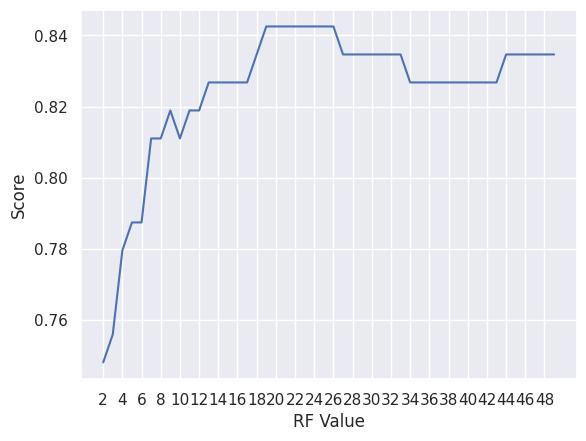

Random Forest Accuracy:  84.25%


In [ ]:
scoreListRF = []
best_RFclassifier = None
best_score = 0

for i in range(2, 50):
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    score = RFclassifier.score(X_test, y_test)
    scoreListRF.append(score)
    if score > best_score:
        best_score = score
        best_RFclassifier = RFclassifier

# Utilizando el mejor modelo para hacer predicciones
y_pred = best_RFclassifier.predict(X_test)

# Calculando la precisión
RFAcc = best_score
print("Precisión Bosque Aleatorio: {:.2f}%".format(RFAcc * 100))

# Generando y mostrando el reporte de clasificación
print(classification_report(y_test, y_pred))

# Calculando y mostrando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Calculando y mostrando el AUC score
rocRF = roc_auc_score(y_test, y_pred)
print('Auc Score: {:.2f}%'.format(rocRF * 100))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,2))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## 5.3 Impulso de Gradiente

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_leaf_nodes=40, n_estimators=500, subsample=1)
0.8732307692307693
{'subsample': 1, 'n_estimators': 500, 'max_leaf_nodes': 40, 'max_depth': 3}
0


Precisión Impulso de Gradiente: 86.61%
              precision    recall  f1-score   support

       False       0.88      0.82      0.85        68
        True       0.81      0.86      0.84        59

    accuracy                           0.84       127
   macro avg       0.84      0.84      0.84       127
weighted avg       0.84      0.84      0.84       127

Matriz de Confusión:
[[56 12]
 [ 8 51]]
Auc Score: 84.40%


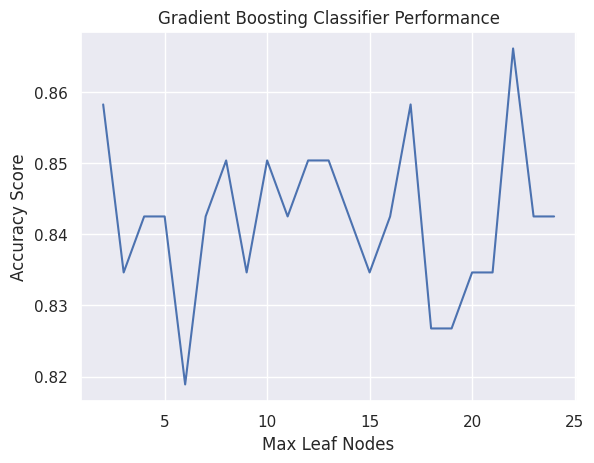

In [ ]:
# Lista para almacenar las puntuaciones
scoreListGB = []

for max_leaf_nodes in range(2, 25):
    GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=500, max_depth=5, max_leaf_nodes=max_leaf_nodes)
    GBclassifier.fit(X_train, y_train)
    y_pred = GBclassifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scoreListGB.append(score)

# Calculando la precisión
GBAcc = max(scoreListGB)
print('Precisión Impulso de Gradiente: {:.2f}%'.format(GBAcc*100))

# Generando y mostrando el reporte de clasificación
print(classification_report(y_test, y_pred))

# Calculando y mostrando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Calculando y mostrando el AUC score
rocGB = roc_auc_score(y_test, y_pred)
print('Auc Score: {:.2f}%'.format(rocGB*100))

# Graficar las puntuaciones
plt.plot(range(2, 25), scoreListGB)
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy Score')
plt.title('Gradient Boosting Classifier Performance')
plt.grid(True)
plt.show()

# 6. Comparación de Modelos

In [ ]:
compare = pd.DataFrame({'Modelo': ['Bosque Aleatorio', 'Impulso de Gradiente',
                                  'Arbol de Decisión'],
                        'Calificación AUC': [rocRF*100, rocGB*100, rocDT*100
                                     ]})
compare.sort_values(by='Calificación AUC', ascending=False)

,Modelo,Calificación AUC
2,Arbol de Decisión,86.714855
0,Bosque Aleatorio,85.069791
1,Impulso de Gradiente,84.396810
